# Titanic dataset analysis 

                                        
## here we will try to find what factors affected the survival of people?
- age
- sex ?
- was it affected by the socio-economic status (SES) by checking the (ticket class) versus the survival?
- passenger fare?
- number of children with parents? (parch)
-  number of siblings / spouses aboard the Titanic

- more than one factor females and children below 18 more likely ?

 


In [7]:
### Load Data from CSVs

import numpy as np
import pandas as pd

filename='titanic_data.csv'
titanic_df = pd.read_csv(filename)
print (titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### First we will group data by survival and see the age in correlation to survival

does the age affect the survival chance in any way
- we first grouped the passengers by the survival to get the age statistics of those who survived like the mean age and the std. we notice that mean for both cases is the same age.
- plotting the histogram. both look very similar
- calculating pearson coeeficient we get -0.07 which is a relationship.
- so from below we can conclude that age alone does not affect survival chances.
- trying to split the age into categories versus the survival rate. we notice that people who are below 14 had a survival rate of .6 compared to people above 50 with a survival rate of .3

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Age', 'Survived']] 
passengers_grouped=passengers.groupby('Survived')
print (passengers_grouped.describe())

            Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


Populating the interactive namespace from numpy and matplotlib


Survived
0    [[Axes(0.125,0.125;0.775x0.755)]]
1    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

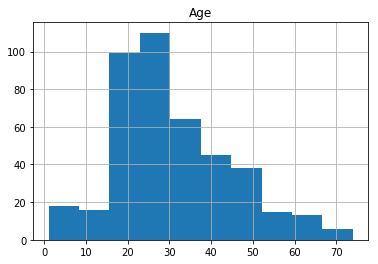

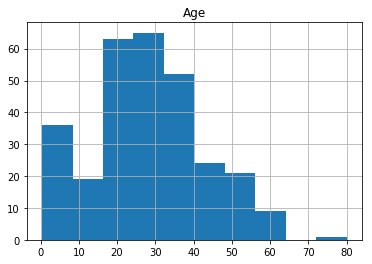

In [52]:
%pylab inline
passengers_grouped.hist()

In [57]:
# pearson correlation of data
print (passengers['Survived'].corr(passengers['Age'], method='pearson') )


-0.0772210945722


In [92]:
passengers = titanic_df[['Age', 'Survived']] 
age_categories = passengers.groupby([pd.qcut(passengers['Age'], q=10)])
age_categories.count() 

,Age,Survived
Age,,
"(0.419, 14.0]",77,77
"(14.0, 19.0]",87,87
"(19.0, 22.0]",67,67
"(22.0, 25.0]",70,70
"(25.0, 28.0]",61,61
"(28.0, 31.8]",66,66
"(31.8, 36.0]",91,91
"(36.0, 41.0]",53,53
"(41.0, 50.0]",78,78


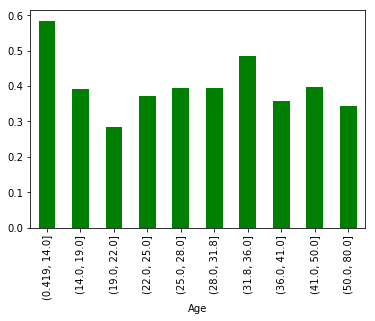

In [93]:
age_categories['Survived'].mean().plot.bar(color='g'); 

## Gender survival rate
we grouped the data by the gender. 
- after checking the statistics we can tell that mean for females is above .7 which means most females survived compared to males who had a mean of .18. 
- histogram shows that most females survived compared to males.


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Sex', 'Survived']] 
passengers_grouped=passengers.groupby(['Sex'])


print (passengers_grouped.describe())

       Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0


Populating the interactive namespace from numpy and matplotlib


Sex
female    [[Axes(0.125,0.125;0.775x0.755)]]
male      [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

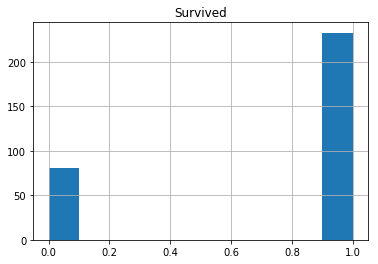

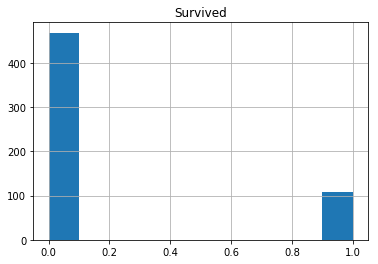

In [71]:
%pylab inline
passengers_grouped.hist()

## socio-economic status (SES) 
- Most people on 1st class survived with a mean of .62 compared to 0.47 for 2nd and .24
- from histpgram we can tell:
    - 1st class more people survived compared to those who passed away
    - 2nd class almost 50% chance
    - 3rd class most people did not survive
- pearson's correlation was -0.338. which is considered highly significant based on http://www.socscistatistics.com/pvalues/pearsondistribution.aspx calculator.(N is 891)      
 


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Pclass', 'Survived']] 

passengers_grouped=passengers.groupby(['Pclass'])


print (passengers_grouped.describe())

       Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0


Populating the interactive namespace from numpy and matplotlib


Pclass
1    [[Axes(0.125,0.125;0.775x0.755)]]
2    [[Axes(0.125,0.125;0.775x0.755)]]
3    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

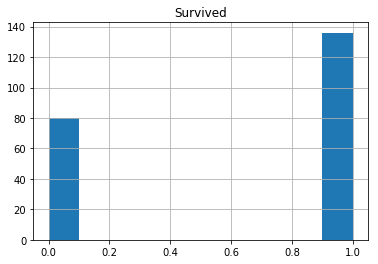

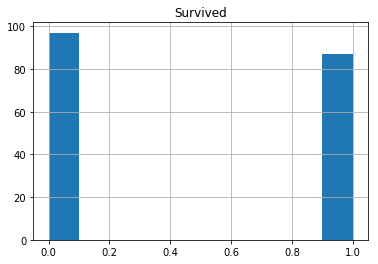

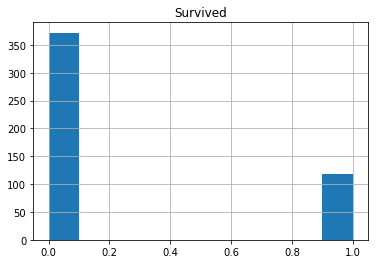

In [75]:
%pylab inline
passengers_grouped.hist()

In [76]:
# pearson correlation of data
print (passengers['Survived'].corr(passengers['Pclass'], method='pearson') )

-0.338481035961


## Fare
- For the fare i split into categories using qcut functions. we noticed that the survival rate for people who had paid above 56 is .7.
- the bar diagram shows that with increased fare we have an increased survival rate
- correlation is 0.25730652238496249. so the higher the fare the higher the chance of survival 


In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Fare', 'Survived']] 

fare_categories = passengers.groupby([pd.qcut(passengers['Fare'], q=7)])
fare_categories.count() 

,Fare,Survived
Fare,,
"(-0.001, 7.75]",140,140
"(7.75, 8.05]",145,145
"(8.05, 12.475]",98,98
"(12.475, 19.258]",128,128
"(19.258, 27.9]",128,128
"(27.9, 56.929]",125,125
"(56.929, 512.329]",127,127


Populating the interactive namespace from numpy and matplotlib


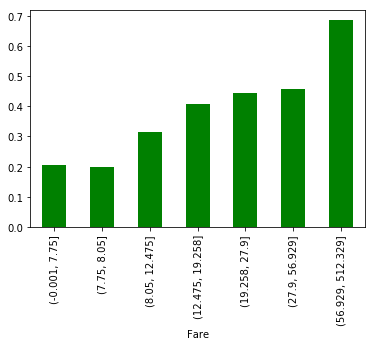

In [104]:
%pylab inline
fare_categories['Survived'].mean().plot.bar(color='g'); 

In [96]:
passengers['Survived'].corr(passengers['Fare'], method='pearson') 

0.25730652238496249

## Parents with parents on board
- we can see from describe that survival rate for parch of 3 has the highest survival rate of .6 
- but pearson correlation gives 0.081629407083483485 so it is a weak correlation 

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Parch', 'Survived']] 

passengers_grouped=passengers.groupby(['Parch'])


print (passengers_grouped.describe())

      Survived                                             
         count      mean       std  min  25%  50%  75%  max
Parch                                                      
0        678.0  0.343658  0.475279  0.0  0.0  0.0  1.0  1.0
1        118.0  0.550847  0.499529  0.0  0.0  1.0  1.0  1.0
2         80.0  0.500000  0.503155  0.0  0.0  0.5  1.0  1.0
3          5.0  0.600000  0.547723  0.0  0.0  1.0  1.0  1.0
4          4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5          5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
6          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0


Populating the interactive namespace from numpy and matplotlib


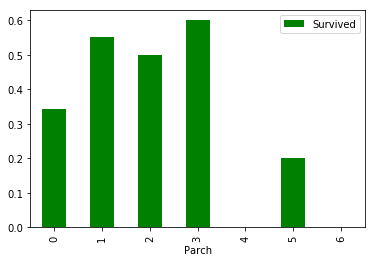

In [111]:
%pylab inline
#passengers_grouped.hist()
passengers_grouped.mean().plot.bar(color='g'); 

In [112]:
passengers['Survived'].corr(passengers['Parch'], method='pearson') 

0.081629407083483485

##  family relation 
- number of siblings / spouses aboard the Titanic
- pearson correlation: 0.035322498885735597





In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['SibSp', 'Survived']] 

passengers_grouped=passengers.groupby(['SibSp'])


print (passengers_grouped.describe())

      Survived                                              
         count      mean       std  min  25%  50%   75%  max
SibSp                                                       
0        608.0  0.345395  0.475888  0.0  0.0  0.0  1.00  1.0
1        209.0  0.535885  0.499908  0.0  0.0  1.0  1.00  1.0
2         28.0  0.464286  0.507875  0.0  0.0  0.0  1.00  1.0
3         16.0  0.250000  0.447214  0.0  0.0  0.0  0.25  1.0
4         18.0  0.166667  0.383482  0.0  0.0  0.0  0.00  1.0
5          5.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
8          7.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0


Populating the interactive namespace from numpy and matplotlib


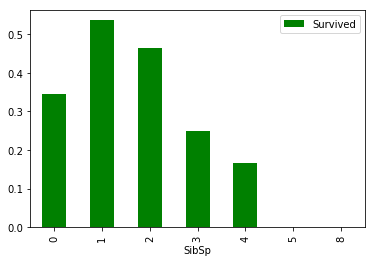

In [115]:
%pylab inline
#passengers_grouped.hist()
passengers_grouped.mean().plot.bar(color='g'); 

In [116]:
passengers['Survived'].corr(passengers['SibSp'], method='pearson') 

-0.035322498885735597

## females and age below 18
- more than one factor females and children below 18 more likely ?
- we can see age groups that are more likely to survive

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

passengers = titanic_df[['Sex', 'Survived','Age']] 

age_categories = passengers.groupby([pd.qcut(passengers['Age'], q=10),'Sex'])

Populating the interactive namespace from numpy and matplotlib


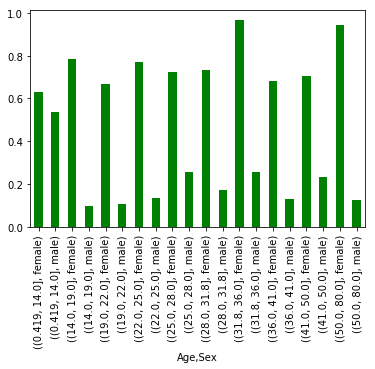

In [120]:
%pylab inline
age_categories['Survived'].mean().plot.bar(color='g'); 